<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision


In [2]:
import torchvision.datasets
import torchvision.models

In [3]:
print(torch.__version__)

2.4.1+cu121


In [40]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [41]:
device

device(type='cpu')

In [4]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [88]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None,

)

In [123]:
test_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
    target_transform = None,
)

In [124]:
len(test_dataset)

10000

In [125]:
len(train_dataset)

60000

In [126]:
classes = train_dataset.classes

In [127]:
image, label = train_dataset[0]

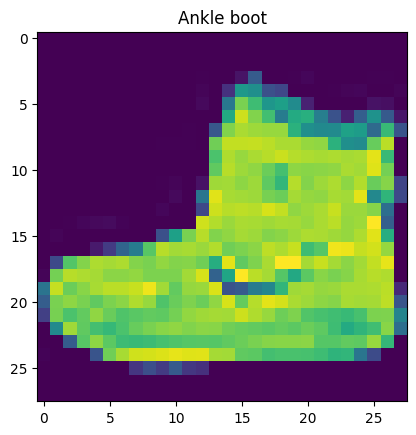

In [128]:
plt.imshow(image.squeeze())
plt.title(classes[label]);

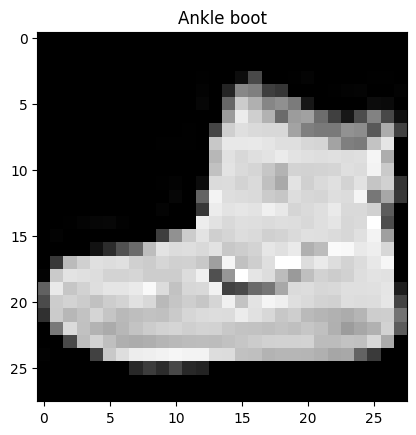

In [129]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(classes[label]);

In [130]:
torch.randint(0,len(train_dataset),(1,))

tensor([16307])

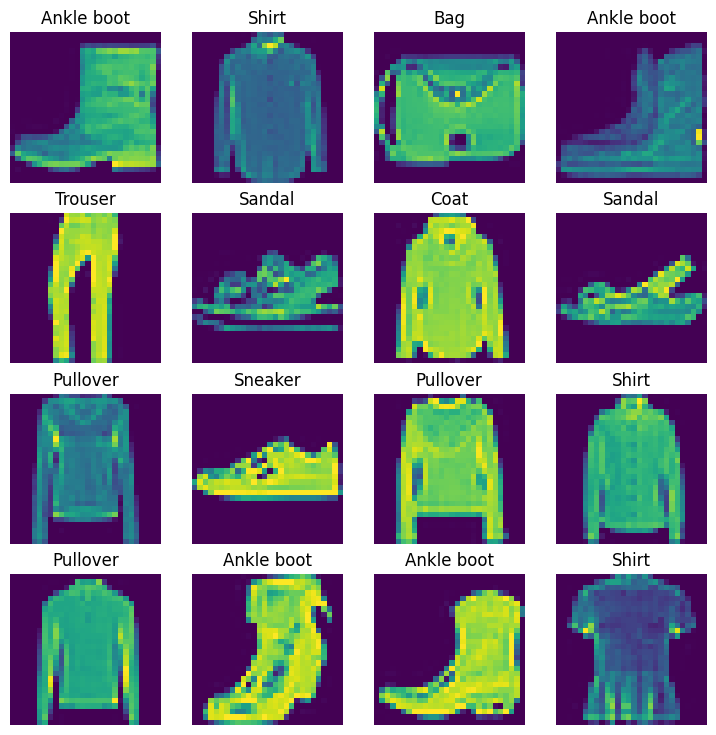

In [131]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
for i in range (1,17):
  j = torch.randint(0,len(train_dataset),size = [1]).item()
  # print(j)
  image, label = train_dataset[j]
  fig.add_subplot(4,4,i)
  plt.imshow(image.squeeze())
  plt.title(classes[label])
  plt.axis(False)
  # break

# **Preparing Data Loader**

In [132]:
from torch.utils.data import DataLoader

In [133]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [134]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [135]:
train_data = DataLoader(
    dataset = train_dataset,
    batch_size = 32,
    shuffle = True,
)

test_data = DataLoader(
    dataset = test_dataset,
    batch_size = 32,
    shuffle = False
)

In [136]:
train_data, test_data

(<torch.utils.data.dataloader.DataLoader at 0x7d287f8b75e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d287f8ed390>)

In [137]:
len(train_data)

1875

In [138]:
train_batch,train_label = next(iter(train_data))

In [139]:
train_batch.shape

torch.Size([32, 1, 28, 28])

In [140]:
train_label.shape

torch.Size([32])

In [141]:
train_batch[0].squeeze().shape

torch.Size([28, 28])

21


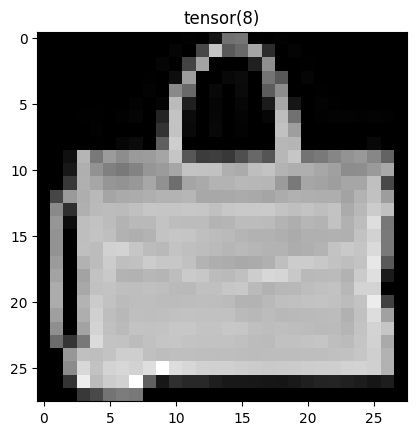

In [142]:
# torch.manual_seed(42)
j = torch.randint(0, len(train_batch), size = [1]).item()
print(j)
plt.imshow(train_batch[j].squeeze(), cmap = 'gray');
plt.title(train_label[j]);

# **Create a model**

In [143]:
import torch.nn as nn

In [144]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_shape, hidden_layer, output_shape):
    super().__init__()

    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_layer),
        nn.Linear(hidden_layer, output_shape),
    )

  def forward(self,x):
    return self.stack(x)

In [145]:
model0 = FashionMNSTv1(input_shape = (28 * 28), hidden_layer = 10,output_shape = len(classes))
model0

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [146]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('The helper file already exists')
else:
  helper = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")


In [147]:
with open('/content/helper_function.py', 'wb') as f:
  f.write(helper.content)

In [148]:
from helper_function import accuracy_fn

In [149]:
# create loss adn accuracy
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr =0.1)

# **Creating timer to track our time**

In [179]:
def print_time(start,end,device):
  total_time = end - start
  print(f'the time on {device} is {total_time}')
  return end-start

In [180]:
from timeit import default_timer as time


In [181]:
# Write the training loop
from tqdm.auto import tqdm
epochs = 3

start_timeon_cpu = time()
for epoch in tqdm(range(epochs)):
  print(f'The epoch is {epoch} ---->')

  train_loss = 0
  model0.train()
  for batch,(X,y) in enumerate(train_data):

    y_logits = model0(X)
    batch_loss = loss_fn(y_logits,y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'training for the batch {batch * len(X)}/{len(train_dataset)}')
  train_loss /= len(train_data)
  model0.eval()
  test_acc, test_loss= 0,0

  with torch.inference_mode():
    for X,y in test_data:
      y_tlogits = model0(X)
      batch_loss = loss_fn(y_tlogits, y)
      test_loss += batch_loss.item()
      accuracy = accuracy_fn(y,y_tlogits.argmax(dim = 1))
      test_acc += accuracy

  test_loss /= len(test_data)
  test_acc /= len(test_data)
  end_time_on_cpu = time()
  totaltime = print_time(start_timeon_cpu, end_time_on_cpu, 'cpu')
  # print(start_timeon_cpu)
  # print(end_time_on_cpu)
  print(f'\nthe average training loss of epoch is {train_loss} the test_loss:{test_loss}, test_accuracy:{test_acc}\n')







  0%|          | 0/3 [00:00<?, ?it/s]

The epoch is 0 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 10.678462501997274

the average training loss of epoch is 0.3959162397702535 the test_loss:0.47829070987221534, test_accuracy:83.22683706070288

The epoch is 1 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 21.27934601099696

the average training loss of epoch is 0.39479763928453127 the test_loss:0.4604823926386361, test_accuracy:83.93570287539936

The epoch is 2 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 31.881706373998895

the average training loss of epoch is 0.39595196483532585 

# **Non linear model**

In [194]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_layers, hidden_layers, output_layers):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_layers, hidden_layers),
        nn.ReLU(),
        nn.Linear(hidden_layers, output_layers),
        nn.ReLU()
    )

  def forward(self, x):
    return self.stack(x)

In [216]:
model1 = FashionMNSTv1((28 * 28), 10, len(classes))
model1

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [217]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.1)


In [218]:
len(train_dataset)

60000

In [219]:
def train_step(model,train_data,loss_fn, optimizer):
  train_loss = 0
  model.train()
  for batch, (X,y) in enumerate(train_data):
    train_logits = model1(X)
    batch_loss = loss_fn(train_logits, y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'running {batch * len(X)}/ {len(train_dataset)}')
  train_loss /= len(train_data)
  print(f'the training loss :{train_loss}')

### Test Loop
def test_step(model,test_data,loss_fn, optimizer, accuracy_fn):
  model.eval()
  test_loss, test_acc = 0,0
  for X,y in test_data:
    with torch.inference_mode():
      test_logits = model(X)
      batch_loss = loss_fn(test_logits, y)
      test_loss += batch_loss.item()
      batch_acc = accuracy_fn(y,test_logits.argmax(dim =1))
      test_acc += batch_acc
  test_loss /= len(test_data)
  test_acc /= len(test_data)
  print(f'testing_loss:{test_loss}, testing_acc:{test_acc}\n')




In [221]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'The results of epoch {epoch}')
  train_step(model1, train_data,loss_fn, optimizer)
  test_step(model1, test_data,loss_fn, optimizer, accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

The results of epoch 0
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.9277604061603546
testing_loss:0.87631417925175, testing_acc:70.62699680511182

The results of epoch 1
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.8662296848773956
testing_loss:0.950346605465435, testing_acc:67.71166134185303

The results of epoch 2
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.8467207236289978
testing_loss:0.8804194464946327, testing_acc:70.14776357827476

